In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster


In [2]:
#Importing the data
data = pd.read_csv(r'ParisHousingClass.csv')
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [3]:
#Checking the datatypes and getting some general information about it 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
#Checking for any null values , we have none in this case
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [5]:
data['category'].unique()

array(['Basic', 'Luxury'], dtype=object)

In [6]:
#We transform the category values into numeric values so that all our data values are numeric 

data['category'].replace("Basic", 0 , inplace = True)
data['category'].replace("Luxury", 1 , inplace = True)

In [7]:
#As you can see all the values are numeric type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [8]:
#We also check for duplicate values, and in our case we have none
data.duplicated().sum()


0

<AxesSubplot:>

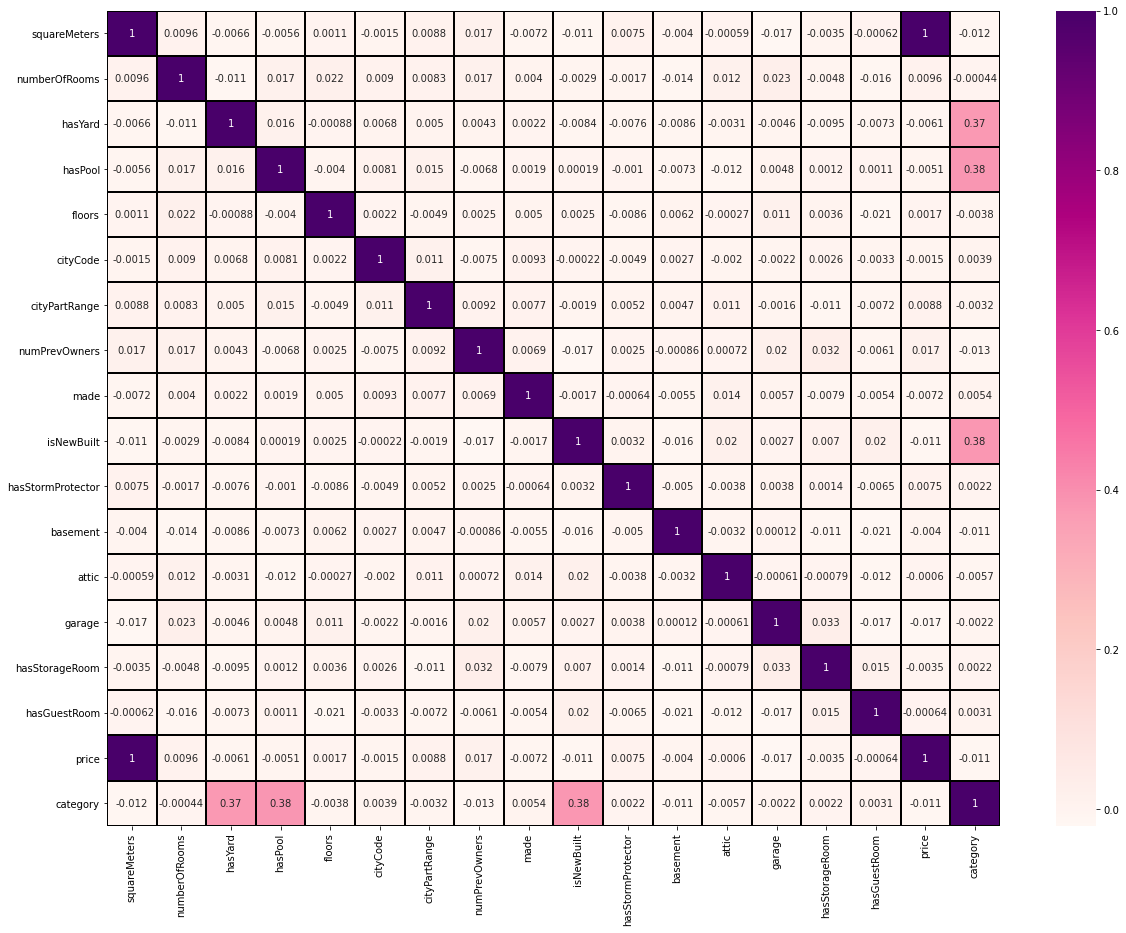

In [9]:
#To get mote insight into the data, we create the heatmap of our data to see the correlation matrix of the values.
#In this case we see that there is high correlation between the category and hasYard, hasPool, isNewBuilt values
#another thing we notice is that squareMeters is 100% correlated with price
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), cbar = True,annot = True, cmap='RdPu', linewidths=1, linecolor='black')

<AxesSubplot:ylabel='category'>

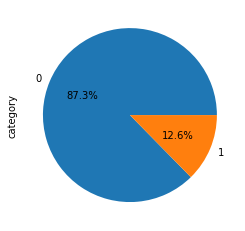

In [10]:
#To visualize the distribution of our two categories we create a pie chart (0-Basic, 1-Luxury)
round(data['category'].value_counts()/data.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

In [11]:
#To get more insight into the data here we can see that all luxerious apartments have yards, but 
#not all the apartments with yards are necessarily luxarious

pd.crosstab(data['category'], data['hasYard'], margins=True).style.background_gradient(cmap="Blues")

hasYard,0,1,All
category,,,
0,4913,3822,8735
1,0,1265,1265
All,4913,5087,10000


In [12]:
#We notice the same logic here, all the luxarious apartments have pools, but not all aprtments with 
#pools are luxarious
pd.crosstab(data['category'], data['hasPool'], margins=True).style.background_gradient(cmap="Blues")

hasPool,0,1,All
category,,,
0,5032,3703,8735
1,0,1265,1265
All,5032,4968,10000


In [13]:
#Again same logic here, all the luxarious apartments are newBuilt, but not all newBuilt apartments
#are luxarious
pd.crosstab(data['category'], data['isNewBuilt'], margins=True).style.background_gradient(cmap="Blues")

isNewBuilt,0,1,All
category,,,
0,5009,3726,8735
1,0,1265,1265
All,5009,4991,10000


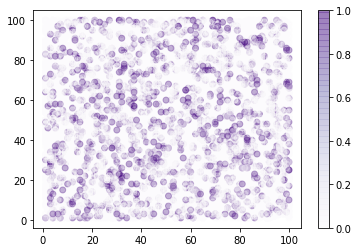

In [14]:
#This scatter plot helps to visualize that Luxurious apartments are distributed almost evenly
plt.scatter(data = data , x="numberOfRooms" , y="floors" , c =data["category"], cmap = 'Purples', alpha = 0.3)
plt.colorbar ()
plt.show()

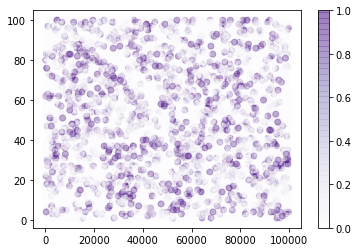

In [15]:
#we notice the same even distribution even for squareMeters and numberOfRooms variables
plt.scatter(data = data , x="squareMeters" , y="numberOfRooms" , c =data["category"], cmap = 'Purples', alpha = 0.3)
plt.colorbar ()
plt.show()

In [16]:
#Since in our correlation matrix we saw that price and squareMeters are 100% correlated, we have to drop one of them
#before doing any tests. We decided to drop the price since we assumed that people who buy luxarious houses would
#care more about the sqare meters of the apatment than the price
data2 = data.drop(["price"], axis = 1)


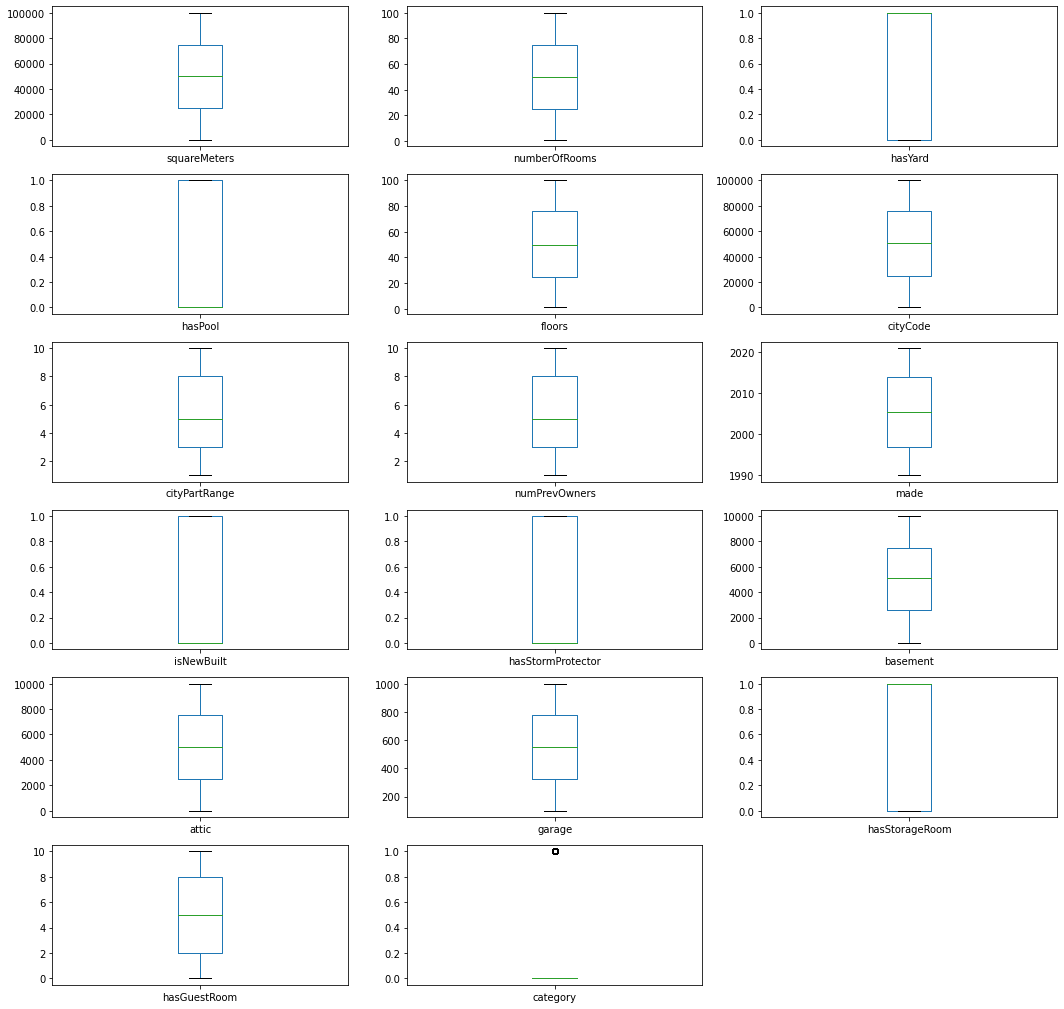

In [17]:
#Here we are checking for the outliers and we can see there are none except for the category, which makes sense 
#since luxarious apartments are the minority
data2.plot(kind = "box" , subplots = True , figsize = (18,18) ,  layout = (6,3))
plt.show()

Since in our case luxarious category is the minority, we will create a dataset that contains equal number of luxarious
and basic apartments to make our classification model non-biased


In [18]:

x_lux = data2[data2['category']==1]
print(x_lux.shape)
x_basic = data2[data2['category']==0].sample(1265)
print(x_basic.shape)

X_equal = [x_basic,x_lux]
balanced_result = pd.concat(X_equal)
balanced_result

(1265, 17)
(1265, 17)


,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
1676,30144,93,1,1,94,75883,5,3,2019,0,1,7886,4098,253,0,4,0
9923,35661,73,0,1,12,3685,9,7,1999,1,0,1197,6533,298,1,10,0
9492,56999,42,1,1,65,65661,2,5,2017,0,1,1551,4807,186,1,6,0
4982,46470,32,0,0,30,65883,7,6,2012,1,0,3805,5285,313,0,2,0
426,18041,90,1,0,99,90750,6,8,2006,1,0,1064,653,221,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,89549,60,1,1,95,1965,2,4,2006,1,0,5919,2553,543,1,6,1
9947,98554,81,1,1,18,85908,9,10,2007,1,1,744,5486,399,0,8,1
9973,14982,64,1,1,13,96468,7,5,2002,1,0,1073,7110,720,1,10,1
9986,26907,65,1,1,43,3916,8,3,2003,1,0,1276,9010,248,0,4,1


We divide the data into x and y, tha category labels will be our y which we will need to predict and so 
we need to drop the category column from our x

In [19]:
X = balanced_result.drop('category',axis=1)
y = balanced_result['category']

Standardizing our data and splitting it into traning and testing data (30% testing, 70% training)

In [20]:
scaler = StandardScaler()
std_df = scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3 , random_state=42)


We are using the Random Forest Classifier and we get very high accuracy score, which might be because of overfitting. 

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train,Y_train)

1.0

In [22]:
Y_pred = rf.predict(X_test)
test = pd.DataFrame({'Predicted_Y':Y_pred, 'Actual_Y':Y_test})
test

,Predicted_Y,Actual_Y
8148,1,1
6291,1,1
1578,0,0
949,1,1
166,0,0
...,...,...
6694,1,1
7614,1,1
9006,0,0
1248,0,0


To check whether it was caused by overfitting we should run a confusion matrix. By the results we can see that everything was correctly predicted. 377: Predicted to be Basic, and they really are basic. 0 : Predicted to be luxurious, but they are basic and etc. 

In [23]:
confusion_matrix(Y_test, Y_pred)


array([[377,   0],
       [  0, 382]])

The test score shows that indeed we get 100% accuracy. 

In [24]:
rf.score(X_test,Y_test)

1.0

In [25]:
categories = ['Basic','Luxurious']
print(classification_report(Y_test, Y_pred, target_names=categories))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00       377
   Luxurious       1.00      1.00      1.00       382

    accuracy                           1.00       759
   macro avg       1.00      1.00      1.00       759
weighted avg       1.00      1.00      1.00       759



To prevent the class from inclining towards the majority class in the our dataset which is the Basic category, we will resemple the data. 

In [26]:
majority = data2[(data2['category']==0)]
minority = data2[(data2['category']==1)]

#upsampling the minority dataset 

minority_upsampled = resample(minority,
                                replace = True,  
                                n_samples = 7500, # to match majority class
                                random_state =42) 

#Combining the majority class with upsampled minority class
upsampled = pd.concat([minority_upsampled, majority])
upsampled.shape


(16235, 17)

Repeating the same steps as before with upsampled dataset

In [28]:
X = upsampled.drop('category',axis=1)
y = upsampled['category']

scaler = StandardScaler()
std_df = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

Now we will be using a different classifier for comparison

In [29]:
kclf = KNeighborsClassifier(n_neighbors=3)
kclf.fit(X_train, Y_train)
kclf.score(X_train,Y_train)

0.9087469200985568

In [30]:
Y_pred = kclf.predict(X_test)
test = pd.DataFrame({'Predicted_Y':Y_pred, 'Actual_Y':Y_test})
test

,Predicted_Y,Actual_Y
9513,0,0
9369,1,1
1947,0,0
2487,1,1
7666,1,1
...,...,...
9567,1,1
7399,0,0
6716,0,0
5771,1,0


In [31]:
confusion_matrix(Y_test, Y_pred)


array([[1878,  760],
       [ 129, 2104]])

In [32]:
kclf.score(X_test,Y_test)


0.8174912748922193

In [33]:
categories = ['Basic','Luxurious']
print(classification_report(Y_test, Y_pred, target_names=categories))

              precision    recall  f1-score   support

       Basic       0.94      0.71      0.81      2638
   Luxurious       0.73      0.94      0.83      2233

    accuracy                           0.82      4871
   macro avg       0.84      0.83      0.82      4871
weighted avg       0.84      0.82      0.82      4871



The next step is to do clustering analysis, the data used is the balanced result from earlier
Here the k means method is used to form 2 clusters

In [38]:
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(balanced_result) 
labels = k_means.labels_
cl = pd.DataFrame(labels, columns=['category'])
cl

,category
0,1
1,0
2,1
3,1
4,1
...,...
2525,0
2526,1
2527,1
2528,0


In [59]:
#To check if this corresponds to the predefined luxury and basic categorys we can compare 
balanced_result['category'].to_frame()
cl.set_axis(['a'], axis='columns')
cat = balanced_result['category'].to_frame()
cat.set_axis(['a'], axis='columns')
cl.compare(cat)

ValueError: Can only compare identically-labeled DataFrame objects

Though a higher number of clusters than 2 might be more suitable for this dataset, this can be visualased by plotting the sum-of-squared errors. According to this 4 clusters could be a good number.

Text(0, 0.5, 'SSE')

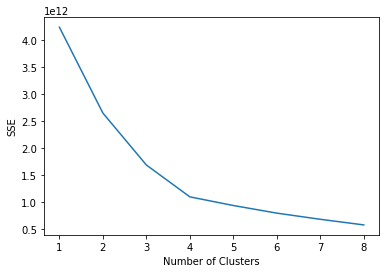

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6,7,8]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(balanced_result)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Another type of cluster analysis is single link clustering which is a form of hierarical clustering shown in a dendogram, though that is difficult with this amount of data

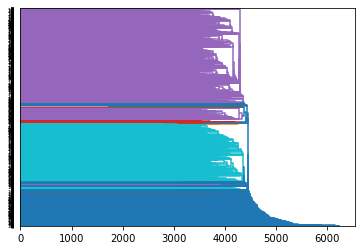

In [66]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = balanced_result['cityPartRange']
#Y = balanced_result['cityPartRange']
X = balanced_result.drop(['cityPartRange'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

A cluster analysis can also be made on a 2-dimensional dataset by dividing by density or distance to a centerpoint. Though in this dataset it's difficult to fins two attributes that has a correlation that creates clusters, though here the number of square meters and number of rooms are plotted and analysed.

<AxesSubplot:xlabel='squareMeters', ylabel='numberOfRooms'>

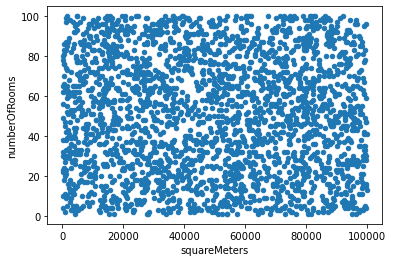

In [103]:
data = balanced_result[['squareMeters', 'numberOfRooms']]
data.plot.scatter(x='squareMeters', y='numberOfRooms')


<AxesSubplot:xlabel='squareMeters', ylabel='numberOfRooms'>

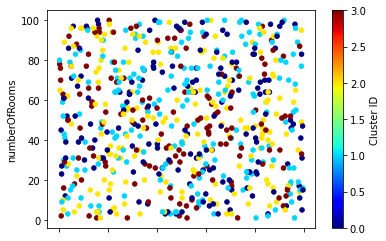

In [87]:
k_means = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1)
k_means.fit(data)
labels = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='squareMeters', y='numberOfRooms',c='Cluster ID', colormap='jet')

<AxesSubplot:xlabel='squareMeters', ylabel='numberOfRooms'>

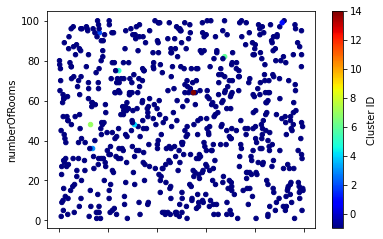

In [101]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=4, min_samples=2).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='squareMeters', y='numberOfRooms',c='Cluster ID', colormap='jet')